In [1]:
from google.colab import files
uploaded = files.upload()


Saving colorferet_metadata.csv to colorferet_metadata.csv


In [3]:
import pandas as pd
df = pd.read_csv('/content/colorferet_metadata.csv')
print(f"Found {len(df)} entries from {len(df.columns)} features")
print(df.head())

Found 994 entries from 7 features
   person_id glasses beard moustache                                   poses  \
0        168     Yes    No        No                                       a   
1        524     Yes    No        No               ql,pr,a,qr,hr,fb,fa,hl,pl   
2        794      No    No        No        fa,fb,rb,pl,pr,hr,ra,ql,qr,rc,hl   
3        727      No    No        No  pl,fa,hr,qr,rc,pr,ql,fb,hl,re,rb,rd,ra   
4        117     Yes    No        No                                       a   

   gender   race  
0    Male  Asian  
1    Male  White  
2    Male  White  
3  Female  White  
4    Male  Asian  


In [5]:
print(df.columns)
print(df.shape)

Index(['person_id', 'glasses', 'beard', 'moustache', 'poses', 'gender',
       'race'],
      dtype='object')
(994, 7)


In [12]:
print(df.isnull().sum())

person_id    0
glasses      0
beard        0
moustache    0
poses        0
gender       6
race         6
dtype: int64


In [13]:
print(df.describe())

         person_id
count   994.000000
mean    507.395372
std     294.191537
min       1.000000
25%     253.250000
50%     507.500000
75%     761.750000
max    1208.000000


In [16]:
print("\nDistribution of binary features:")
for col in ['glasses', 'beard', 'moustache']:
    print(f"\n{col.capitalize()} distribution:")
    value_counts = df[col].value_counts()
    for value, count in value_counts.items():
        percentage = count / len(df) * 100
        print(f"  {value}: {count} ({percentage:.1f}%)")


Distribution of binary features:

Glasses distribution:
  No: 828 (83.3%)
  Yes: 166 (16.7%)

Beard distribution:
  No: 938 (94.4%)
  Yes: 56 (5.6%)

Moustache distribution:
  No: 905 (91.0%)
  Yes: 89 (9.0%)


In [17]:
df['poses_count'] = df['poses'].str.split(',').str.len()
print("\nNumber of poses per person:")
print(df['poses_count'].value_counts().sort_index())
print(f"Mean number of poses per person: {df['poses_count'].mean():.1f}")


Number of poses per person:
poses_count
1      69
4       5
5     115
6     265
7      41
8      40
9      35
10     26
11    312
12     16
13     67
14      3
Name: count, dtype: int64
Mean number of poses per person: 8.0


<ipython-input-20-f914e580c881>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')
<ipython-input-20-f914e580c881>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')
<ipython-input-20-f914e580c881>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


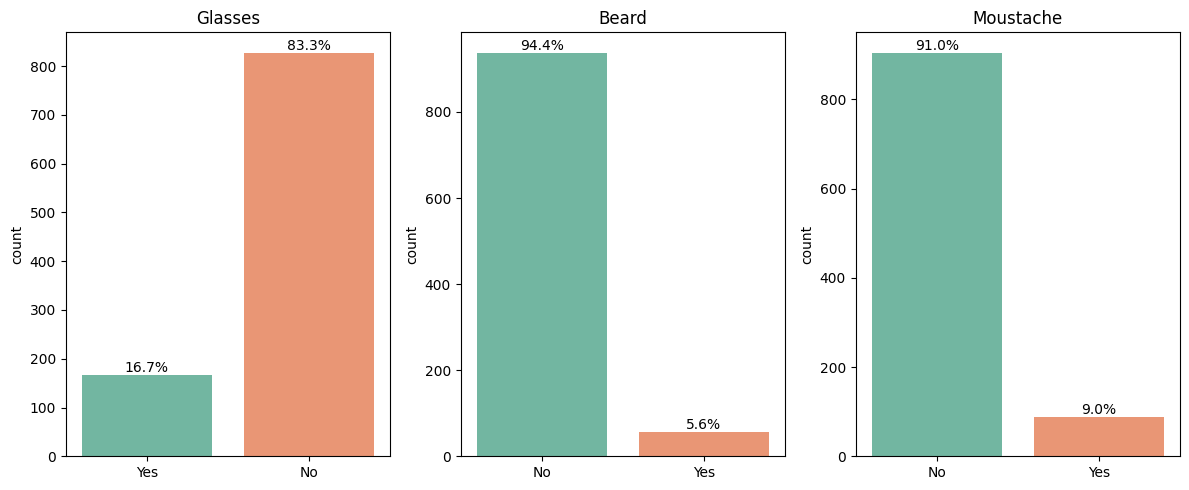

In [20]:
plt.figure(figsize=(12, 5))
binary_features = ['glasses', 'beard', 'moustache']
for i, feature in enumerate(binary_features):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=feature, data=df, palette='Set2')
    plt.title(f'{feature.capitalize()}', fontsize=12)
    plt.xlabel('')

    # Add percentage labels
    total = len(df)
    for p in plt.gca().patches:
        percentage = p.get_height() / total * 100
        plt.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'bottom')
plt.tight_layout()
plt.show()

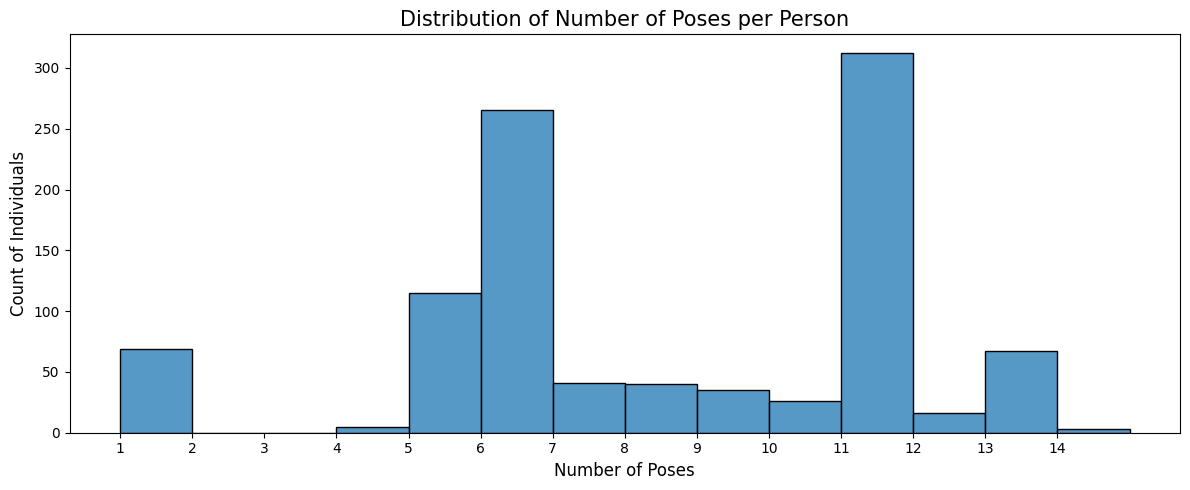

In [21]:
plt.figure(figsize=(12, 5))
sns.histplot(df['poses_count'], bins=range(1, df['poses_count'].max() + 2), kde=False)
plt.title('Distribution of Number of Poses per Person', fontsize=15)
plt.xlabel('Number of Poses', fontsize=12)
plt.ylabel('Count of Individuals', fontsize=12)
plt.xticks(range(1, df['poses_count'].max() + 1))
plt.tight_layout()
plt.show()

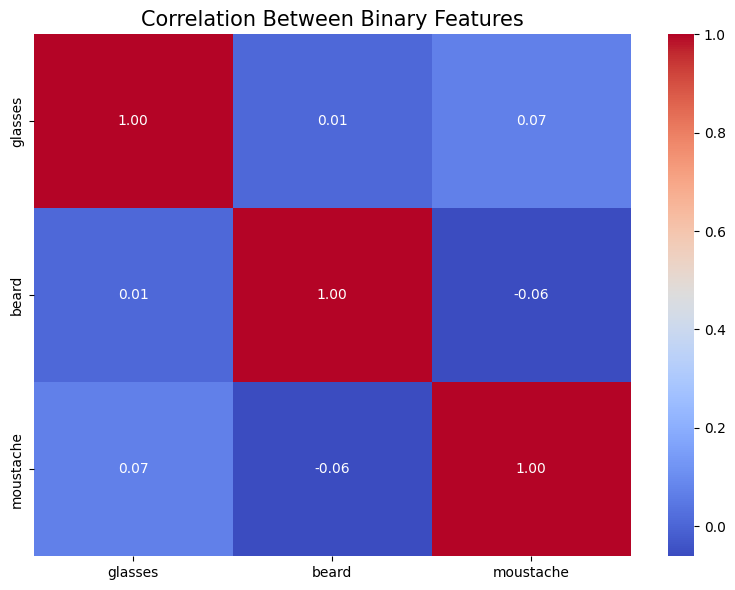

In [22]:
plt.figure(figsize=(8, 6))
binary_df = df[binary_features].copy()
for col in binary_features:
    binary_df[col] = binary_df[col].map({'Yes': 1, 'No': 0})
corr_matrix = binary_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Binary Features', fontsize=15)
plt.tight_layout()
plt.show()


In [23]:
print("\nGender distribution:")
gender_counts = df['gender'].value_counts()
print(gender_counts)
print(f"Gender percentages: {(gender_counts / len(df) * 100).round(1)}")


Gender distribution:
gender
Male      588
Female    400
Name: count, dtype: int64
Gender percentages: gender
Male      59.2
Female    40.2
Name: count, dtype: float64


In [24]:
print("\nRace distribution:")
race_counts = df['race'].value_counts()
print(race_counts)
print(f"Race percentages (top 5): {(race_counts.head() / len(df) * 100).round(1)}")


Race distribution:
race
White       614
Asian       224
Black        77
Hispanic     57
Pacific      10
Other         4
Native        2
Name: count, dtype: int64
Race percentages (top 5): race
White       61.8
Asian       22.5
Black        7.7
Hispanic     5.7
Pacific      1.0
Name: count, dtype: float64


In [25]:
print("\nFeature counts:")
print(f"Individuals with glasses: {df['glasses'].value_counts().get('Yes', 0)} ({df['glasses'].value_counts().get('Yes', 0)/len(df)*100:.1f}%)")
print(f"Individuals with beard: {df['beard'].value_counts().get('Yes', 0)} ({df['beard'].value_counts().get('Yes', 0)/len(df)*100:.1f}%)")
print(f"Individuals with moustache: {df['moustache'].value_counts().get('Yes', 0)} ({df['moustache'].value_counts().get('Yes', 0)/len(df)*100:.1f}%)")


Feature counts:
Individuals with glasses: 166 (16.7%)
Individuals with beard: 56 (5.6%)
Individuals with moustache: 89 (9.0%)


In [26]:
all_poses = []
for poses in df['poses'].str.split(','):
    if isinstance(poses, list):  # Handle potential NaN values
        all_poses.extend(poses)

unique_poses = set(all_poses)
print(f"\nNumber of unique poses: {len(unique_poses)}")
print(f"Unique poses: {', '.join(sorted(unique_poses))}")


Number of unique poses: 16
Unique poses: a, b, c, fa, fb, hl, hr, pl, pr, ql, qr, ra, rb, rc, rd, re


In [27]:
pose_counts = {}
for pose in unique_poses:
    pose_counts[pose] = sum(df['poses'].str.contains(pose, na=False))

print("\nPose frequency (top 10):")
for pose, count in sorted(pose_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{pose}: {count} ({count/len(df)*100:.1f}%)")


Pose frequency (top 10):
a: 990 (99.6%)
pr: 920 (92.6%)
fa: 918 (92.4%)
b: 916 (92.2%)
fb: 915 (92.1%)
pl: 899 (90.4%)
hr: 893 (89.8%)
hl: 858 (86.3%)
qr: 499 (50.2%)
ql: 496 (49.9%)


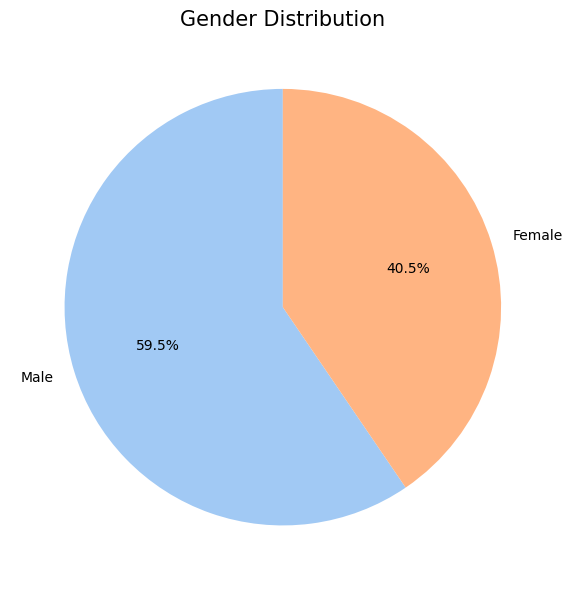

In [28]:
plt.figure(figsize=(10, 6))
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Gender Distribution', fontsize=15)
plt.tight_layout()
plt.show()

<ipython-input-29-70f116b8003d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')


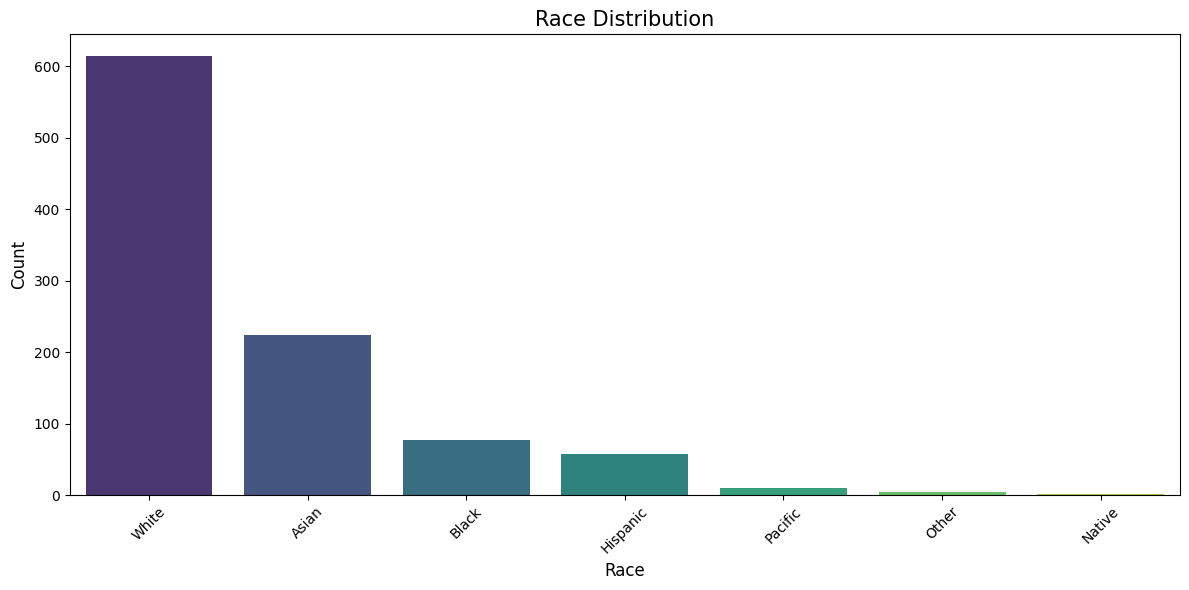

In [29]:
plt.figure(figsize=(12, 6))
race_counts = df['race'].value_counts().sort_values(ascending=False)
sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')
plt.title('Race Distribution', fontsize=15)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-30-d7b785331369>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=feature_counts, palette='Set2')


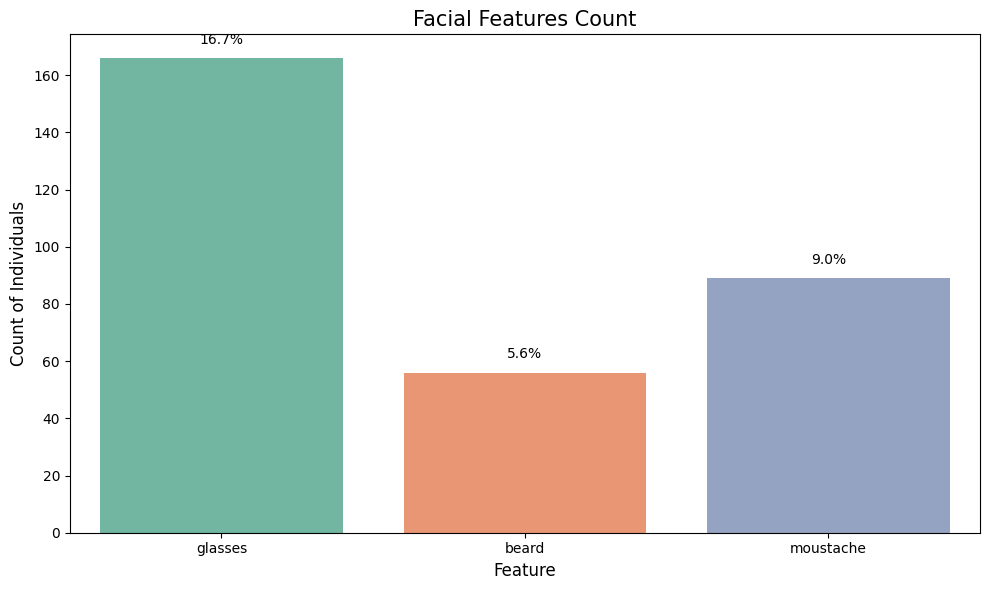

In [30]:
plt.figure(figsize=(10, 6))
features = ['glasses', 'beard', 'moustache']
feature_counts = [df[feature].value_counts().get('Yes', 0) for feature in features]

sns.barplot(x=features, y=feature_counts, palette='Set2')
plt.title('Facial Features Count', fontsize=15)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Count of Individuals', fontsize=12)

# Add percentage labels on top of each bar
for i, count in enumerate(feature_counts):
    percentage = count / len(df) * 100
    plt.text(i, count + 5, f'{percentage:.1f}%', ha='center')

plt.tight_layout()
plt.show()

<ipython-input-31-5c30d2913456>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_poses.index, y=top_poses.values, palette='Blues_d')


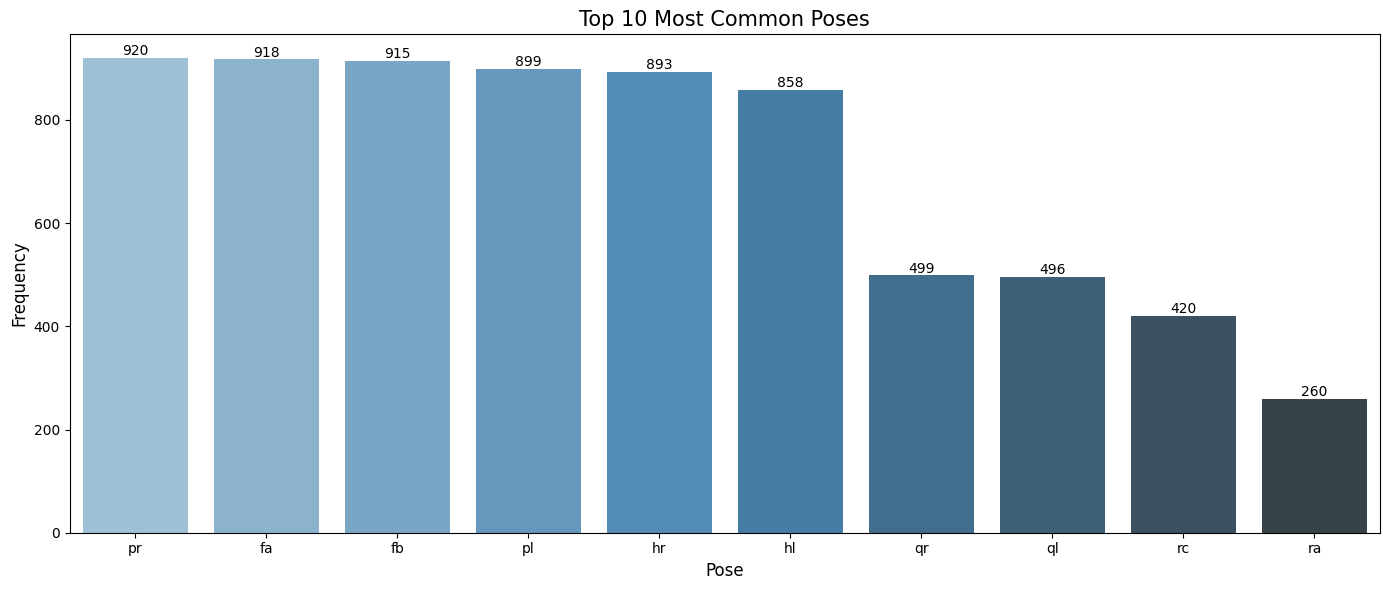

In [31]:
plt.figure(figsize=(14, 6))

# Count occurrences of each pose
pose_counts = pd.Series(all_poses).value_counts().sort_values(ascending=False)
top_poses = pose_counts.head(10)

sns.barplot(x=top_poses.index, y=top_poses.values, palette='Blues_d')
plt.title('Top 10 Most Common Poses', fontsize=15)
plt.xlabel('Pose', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add count labels on top of each bar
for i, count in enumerate(top_poses.values):
    plt.text(i, count + 5, str(count), ha='center')

plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

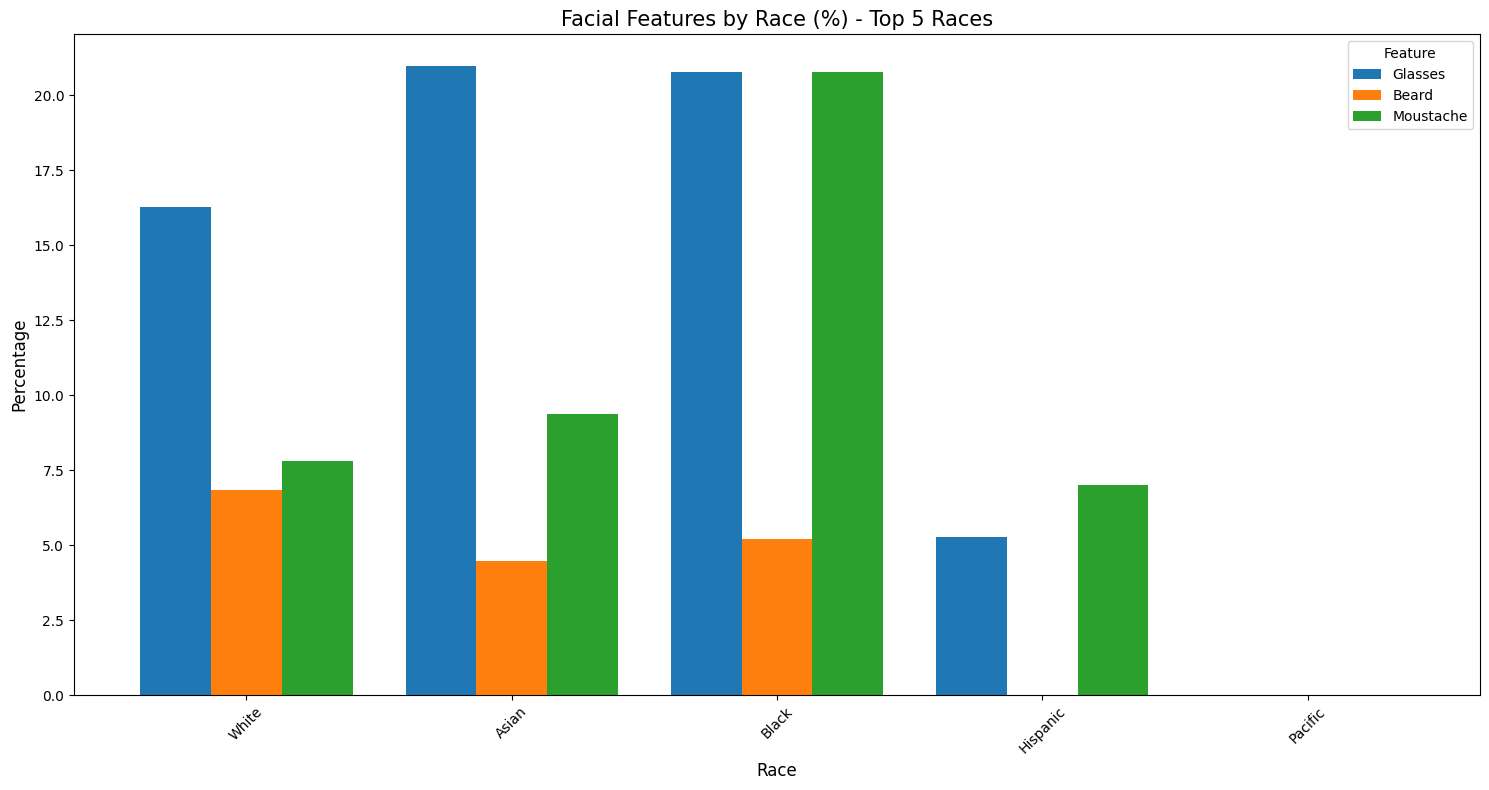

In [33]:
plt.figure(figsize=(15, 8))
top_races = race_counts.head(5).index  # Top 5 most common races

race_groups = df[df['race'].isin(top_races)].groupby('race')
feature_by_race = pd.DataFrame({
    'Glasses': [race_groups.get_group(race)['glasses'].value_counts().get('Yes', 0) / len(race_groups.get_group(race)) * 100
               for race in top_races],
    'Beard': [race_groups.get_group(race)['beard'].value_counts().get('Yes', 0) / len(race_groups.get_group(race)) * 100
             for race in top_races],
    'Moustache': [race_groups.get_group(race)['moustache'].value_counts().get('Yes', 0) / len(race_groups.get_group(race)) * 100
                 for race in top_races]
}, index=top_races)

feature_by_race.plot(kind='bar', figsize=(15, 8), width=0.8)
plt.title('Facial Features by Race (%) - Top 5 Races', fontsize=15)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
print("\nCross-tabulation of beard and moustache:")
beard_moustache_crosstab = pd.crosstab(df['beard'], df['moustache'], margins=True)
print(beard_moustache_crosstab)

# Calculate percentages
beard_moustache_pct = pd.crosstab(df['beard'], df['moustache'], normalize='index') * 100
print("\nPercentage (row-wise):")
print(beard_moustache_pct.round(1))


Cross-tabulation of beard and moustache:
moustache   No  Yes  All
beard                   
No         850   88  938
Yes         55    1   56
All        905   89  994

Percentage (row-wise):
moustache    No  Yes
beard               
No         90.6  9.4
Yes        98.2  1.8


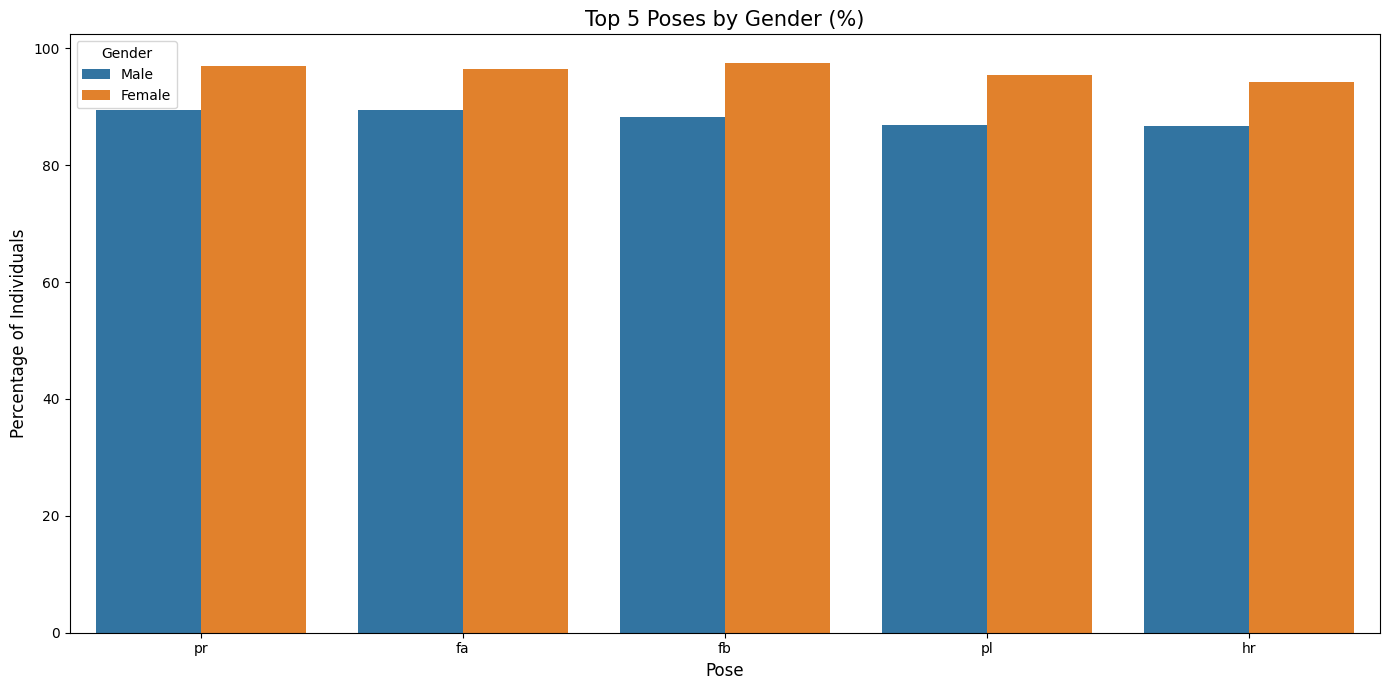

In [35]:
gender_pose_data = []

for gender in gender_counts.index:
    gender_df = df[df['gender'] == gender]

    # Get all poses for this gender
    gender_poses = []
    for poses in gender_df['poses'].str.split(','):
        if isinstance(poses, list):
            gender_poses.extend(poses)

    # Count pose frequencies
    gender_pose_counts = pd.Series(gender_poses).value_counts()

    # Normalize to percentage
    gender_pose_percentages = gender_pose_counts / len(gender_df) * 100

    # Add to data list
    for pose, percentage in gender_pose_percentages.items():
        gender_pose_data.append({
            'Gender': gender,
            'Pose': pose,
            'Percentage': percentage
        })

gender_pose_df = pd.DataFrame(gender_pose_data)

# Plot the most common poses by gender
top_pose_names = sorted(pose_counts.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_pose_names = [p[0] for p in top_pose_names]

plt.figure(figsize=(14, 7))
filtered_df = gender_pose_df[gender_pose_df['Pose'].isin(top_5_pose_names)]

sns.barplot(x='Pose', y='Percentage', hue='Gender', data=filtered_df)
plt.title('Top 5 Poses by Gender (%)', fontsize=15)
plt.xlabel('Pose', fontsize=12)
plt.ylabel('Percentage of Individuals', fontsize=12)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

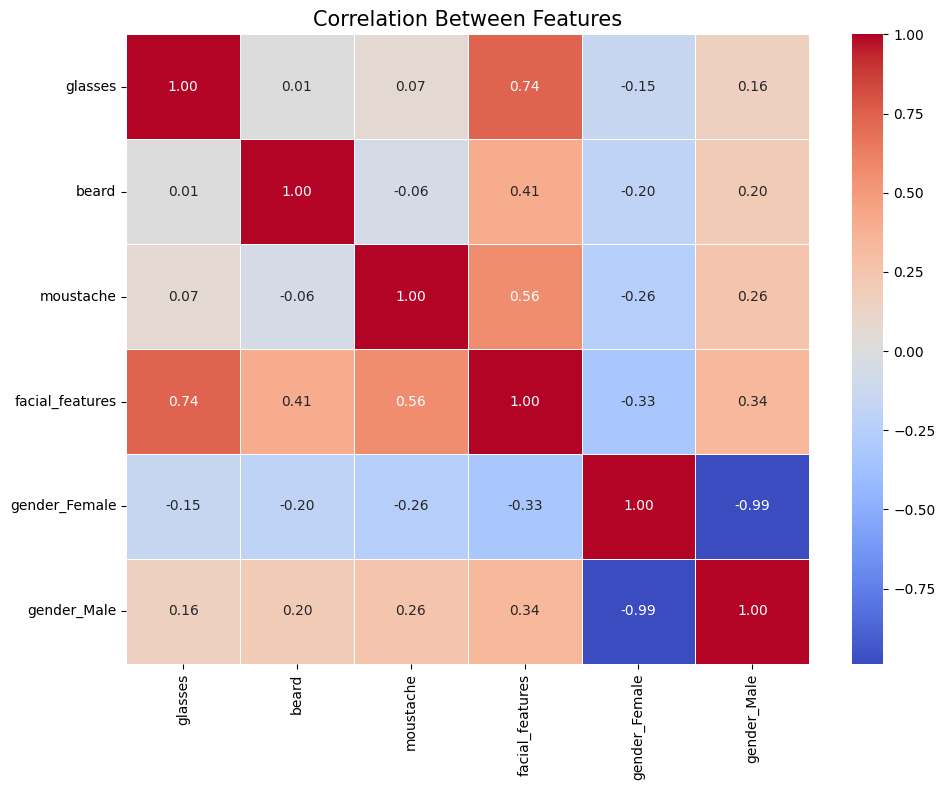

In [37]:
df_numeric = df.copy()
df_numeric['glasses'] = df_numeric['glasses'].map({'Yes': 1, 'No': 0})
df_numeric['beard'] = df_numeric['beard'].map({'Yes': 1, 'No': 0})
df_numeric['moustache'] = df_numeric['moustache'].map({'Yes': 1, 'No': 0})

# One-hot encode gender
df_numeric = pd.get_dummies(df_numeric, columns=['gender'], prefix='gender')

# Calculate correlation between features
correlation_columns = ['glasses', 'beard', 'moustache', 'facial_features'] + \
                      [col for col in df_numeric.columns if col.startswith('gender_')]
correlation_matrix = df_numeric[correlation_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Features', fontsize=15)
plt.tight_layout()
plt.show()


Statistics on number of poses per person:
count    994.000000
mean       8.021127
std        3.264530
min        1.000000
25%        6.000000
50%        8.000000
75%       11.000000
max       14.000000
Name: num_poses, dtype: float64


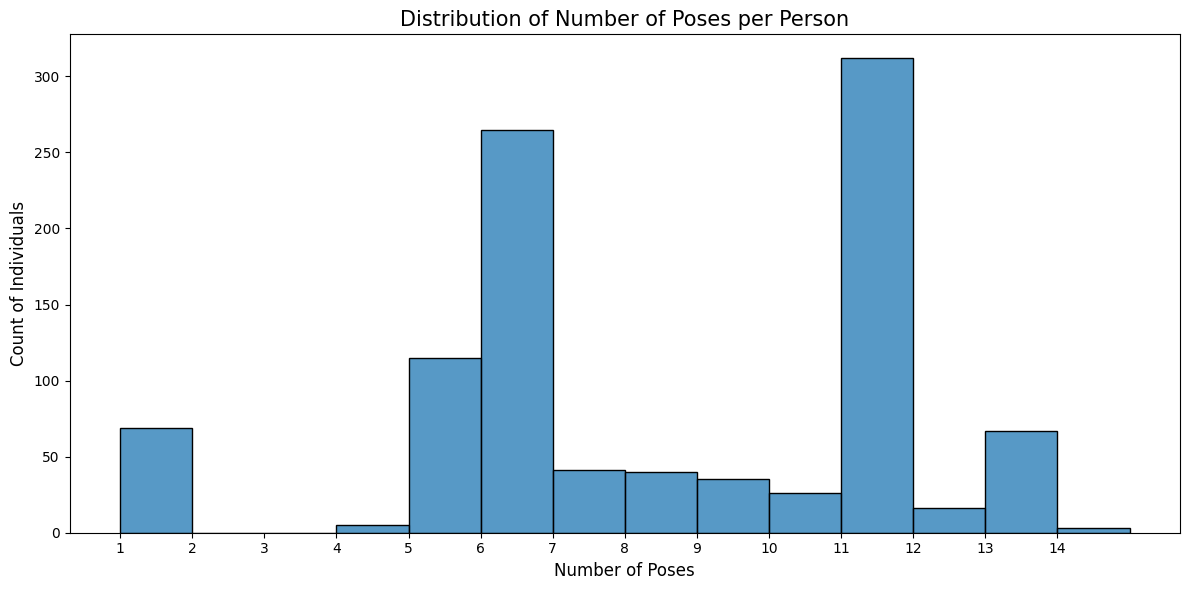

In [38]:
if 'num_poses' not in df.columns:
    df['num_poses'] = df['poses'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Display statistics on number of poses
print("\nStatistics on number of poses per person:")
print(df['num_poses'].describe())

# Plot distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['num_poses'], bins=range(1, df['num_poses'].max() + 2), kde=False)
plt.title('Distribution of Number of Poses per Person', fontsize=15)
plt.xlabel('Number of Poses', fontsize=12)
plt.ylabel('Count of Individuals', fontsize=12)
plt.xticks(range(1, df['num_poses'].max() + 1))
plt.tight_layout()
plt.show()


Cross-tabulation of race and gender:
gender    Female  Male
race                  
Asian         62   162
Black         43    34
Hispanic      30    27
Native         2     0
Other          2     2
Pacific        6     4
White        255   359

Percentage of each gender within races (row-wise):
gender    Female  Male
race                  
Asian       27.7  72.3
Black       55.8  44.2
Hispanic    52.6  47.4
Native     100.0   0.0
Other       50.0  50.0
Pacific     60.0  40.0
White       41.5  58.5


<Figure size 1400x700 with 0 Axes>

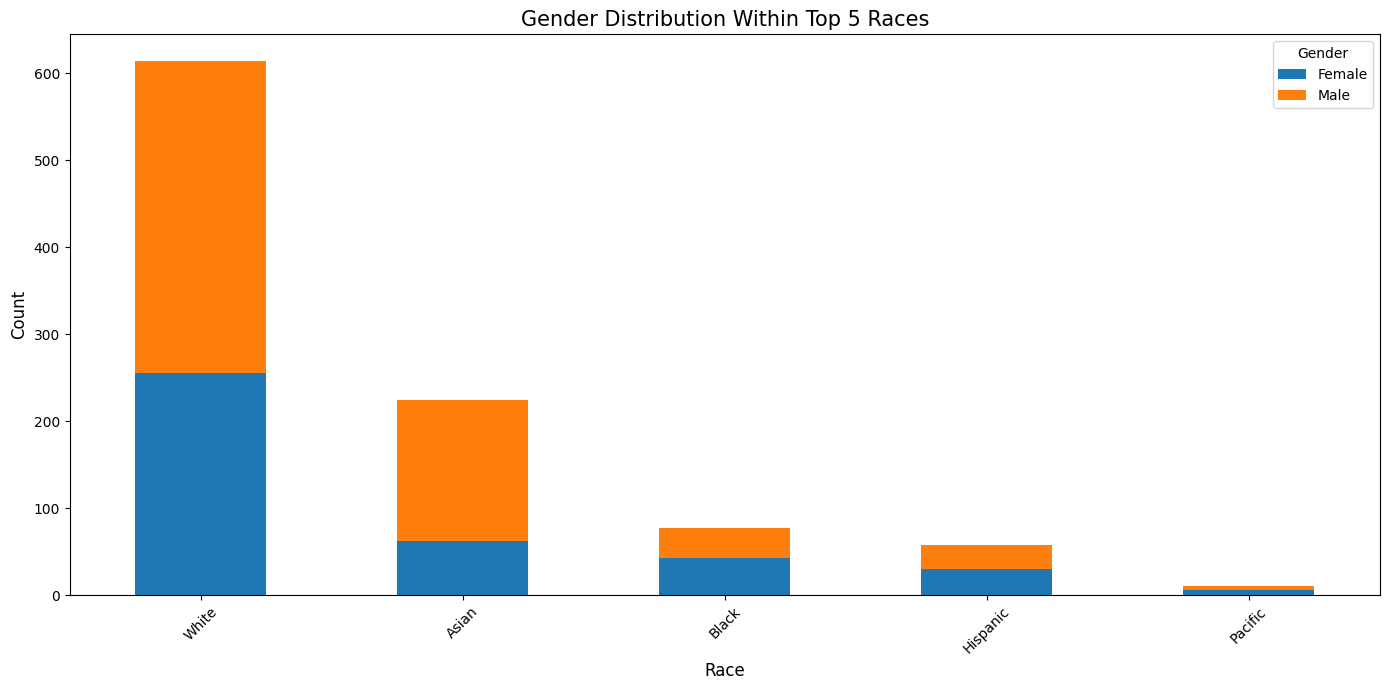

In [39]:
race_gender_crosstab = pd.crosstab(df['race'], df['gender'])
print("\nCross-tabulation of race and gender:")
print(race_gender_crosstab)

# Calculate percentages within each race
race_gender_pct = pd.crosstab(df['race'], df['gender'], normalize='index') * 100
print("\nPercentage of each gender within races (row-wise):")
print(race_gender_pct.round(1))

# Plot gender distribution within top races
plt.figure(figsize=(14, 7))
top_races_gender = race_gender_crosstab.loc[top_races]
top_races_gender.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Gender Distribution Within Top 5 Races', fontsize=15)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
print("\n================ SUMMARY OF KEY FINDINGS ================")
print(f"1. Total number of individuals in the dataset: {len(df)}")
print(f"2. Gender distribution: {', '.join([f'{gender}: {count} ({count/len(df)*100:.1f}%)' for gender, count in gender_counts.items()])}")
print(f"3. Most common race: {race_counts.index[0]} with {race_counts.values[0]} individuals ({race_counts.values[0]/len(df)*100:.1f}%)")

top_pose = sorted(pose_counts.items(), key=lambda x: x[1], reverse=True)[0]
print(f"4. Most common pose: {top_pose[0]} appearing in {top_pose[1]} individuals")

print(f"5. Percentage of individuals with glasses: {df['glasses'].value_counts().get('Yes', 0)/len(df)*100:.1f}%")
print(f"6. Percentage of individuals with beard: {df['beard'].value_counts().get('Yes', 0)/len(df)*100:.1f}%")
print(f"7. Percentage of individuals with moustache: {df['moustache'].value_counts().get('Yes', 0)/len(df)*100:.1f}%")
print(f"8. Average number of poses per individual: {df['num_poses'].mean():.1f}")

# Any strong relationships identified
most_corr = correlation_matrix.unstack().sort_values(ascending=False)
most_corr = most_corr[most_corr < 1.0].head(3)  # Get top 3 correlations excluding self-correlations
print("\n9. Strongest relationships found:")
for idx, corr in most_corr.items():
    print(f"   {idx[0]} and {idx[1]}: {corr:.2f} correlation")


================ SUMMARY OF KEY FINDINGS ================
1. Total number of individuals in the dataset: 994
2. Gender distribution: Male: 588 (59.2%), Female: 400 (40.2%)
3. Most common race: White with 614 individuals (61.8%)
4. Most common pose: pr appearing in 920 individuals
5. Percentage of individuals with glasses: 16.7%
6. Percentage of individuals with beard: 5.6%
7. Percentage of individuals with moustache: 9.0%
8. Average number of poses per individual: 8.0

9. Strongest relationships found:
   glasses and facial_features: 0.74 correlation
   facial_features and glasses: 0.74 correlation
   facial_features and moustache: 0.56 correlation
